In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\Airline_price.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
df.sample(6)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219584,219584,Vistara,UK-953,Delhi,Night,one,Early_Morning,Hyderabad,Business,11.17,10,47329
11831,11831,Air_India,AI-877,Delhi,Morning,one,Evening,Bangalore,Economy,6.08,11,11520
293007,293007,Vistara,UK-836,Chennai,Morning,one,Night,Mumbai,Business,10.00,42,80566
193740,193740,Indigo,6E-6006,Chennai,Afternoon,one,Night,Mumbai,Economy,7.58,49,1830
219270,219270,Vistara,UK-945,Delhi,Morning,one,Afternoon,Hyderabad,Business,24.58,4,61553
88645,88645,Indigo,6E-276,Bangalore,Afternoon,one,Night,Delhi,Economy,7.25,24,4806


In [14]:
df.shape

(300153, 12)

In [15]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [16]:
#checking data types of columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


All variables has correct data types.

In [6]:
#checking for null values
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [17]:
#drop 'Unnamed: 0' because it's index
#drop 'flight' because it's flight code. The Fare is not depend on flight code.

df.drop(['Unnamed: 0','flight'],axis=1,inplace=True)

In [19]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [18]:
#checking for duplicate rows
df.duplicated().sum()

2213

In [32]:
#droping duplicate rows
df.drop_duplicates(inplace=True)

In [33]:
#check that dupicates were removed or not
df.duplicated().sum()

0

In [35]:
#check the shape of data after removing duplicates
df.shape

(297940, 10)

In [21]:
#checking for statistical summary of numerical variables
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [23]:
#checking for correlation between variables
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [24]:
#checking unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: airline
Unique Values:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values:
['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values:
['Economy' 'Business']

Column: duration
Unique Values:
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.

There is no suspicious unique value in any variables.

### Data set is cleaned now , rechecking the dataset

In [36]:
df.shape

(297940, 10)

In [37]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


In [39]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [43]:
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: airline
Unique Values:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values:
['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values:
['Economy' 'Business']

Column: duration
Unique Values:
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.

Everything dataset seems alright, saving cleaned dataset to system.

In [42]:
# Save cleaned file to system

df.to_csv('Airlines_Cleaned_File.csv', index=False)

# Research Questions:

### A) Does price vary with Airlines?

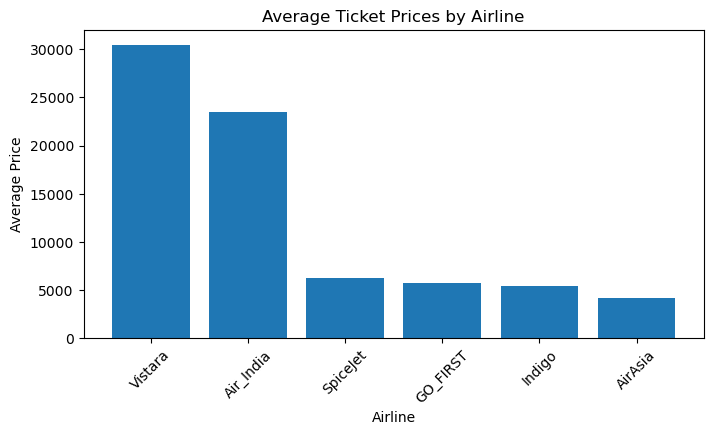

In [45]:
average_prices = df.groupby('airline')['price'].mean()
average_prices = average_prices.reset_index()
average_prices = average_prices.sort_values('price', ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(average_prices['airline'], average_prices['price'])
plt.xticks(rotation=45)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

In [46]:
average_prices

,airline,price
5,Vistara,30494.718735
1,Air_India,23507.894451
4,SpiceJet,6210.620542
2,GO_FIRST,5668.456678
3,Indigo,5348.720367
0,AirAsia,4099.466554


### B) How is the price affected when tickets are bought in just 1 or 2 days before departure?

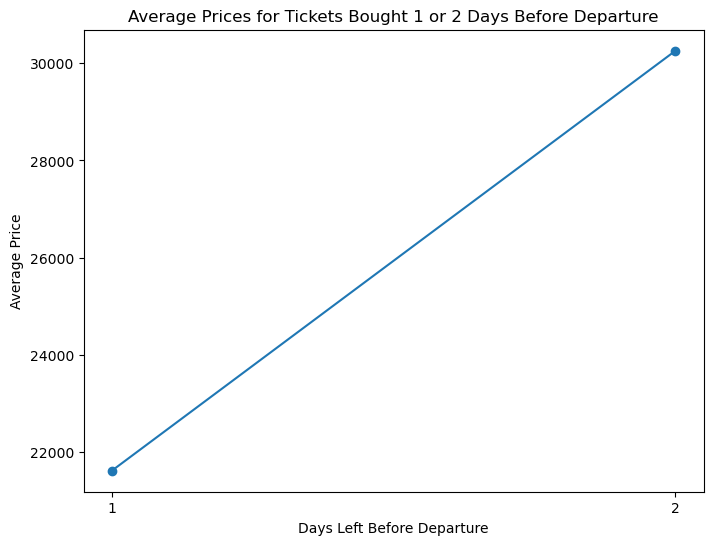

In [47]:
filtered_data = df[df['days_left'].isin([1, 2])]

average_prices = filtered_data.groupby('days_left')['price'].mean()

plt.figure(figsize=(8, 6))
average_prices.plot(kind='line', marker='o')
plt.title('Average Prices for Tickets Bought 1 or 2 Days Before Departure')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Price')
plt.xticks([1, 2])
plt.show()

In [48]:
average_prices

days_left
1    21610.413021
2    30258.174682
Name: price, dtype: float64

### C) Does ticket price change based on the departure time and arrival time?

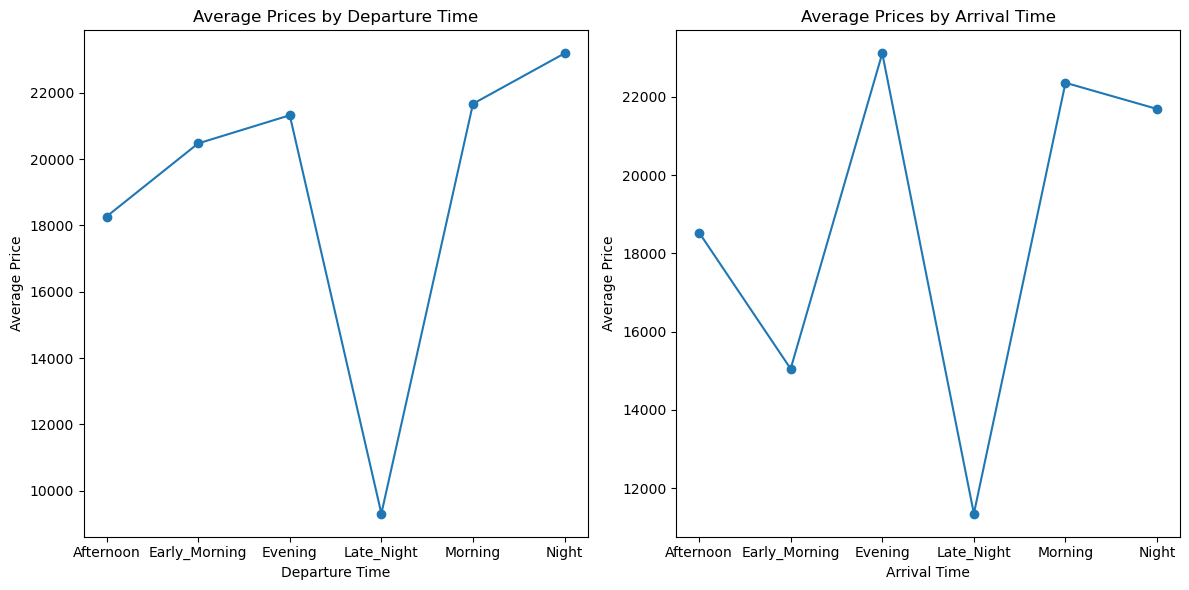

In [50]:
average_prices_departure = df.groupby('departure_time')['price'].mean()
average_prices_arrival = df.groupby('arrival_time')['price'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
average_prices_departure.plot(kind='line', marker='o')
plt.title('Average Prices by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')

plt.subplot(1, 2, 2)
average_prices_arrival.plot(kind='line', marker='o')
plt.title('Average Prices by Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [51]:
average_prices_departure

departure_time
Afternoon        18268.688786
Early_Morning    20474.416875
Evening          21323.489461
Late_Night        9310.037634
Morning          21670.239156
Night            23191.115108
Name: price, dtype: float64

In [52]:
average_prices_arrival

arrival_time
Afternoon        18533.845280
Early_Morning    15051.647231
Evening          23111.668740
Late_Night       11352.135730
Morning          22359.295952
Night            21690.472881
Name: price, dtype: float64

### D) How the price changes with change in Source and Destination?

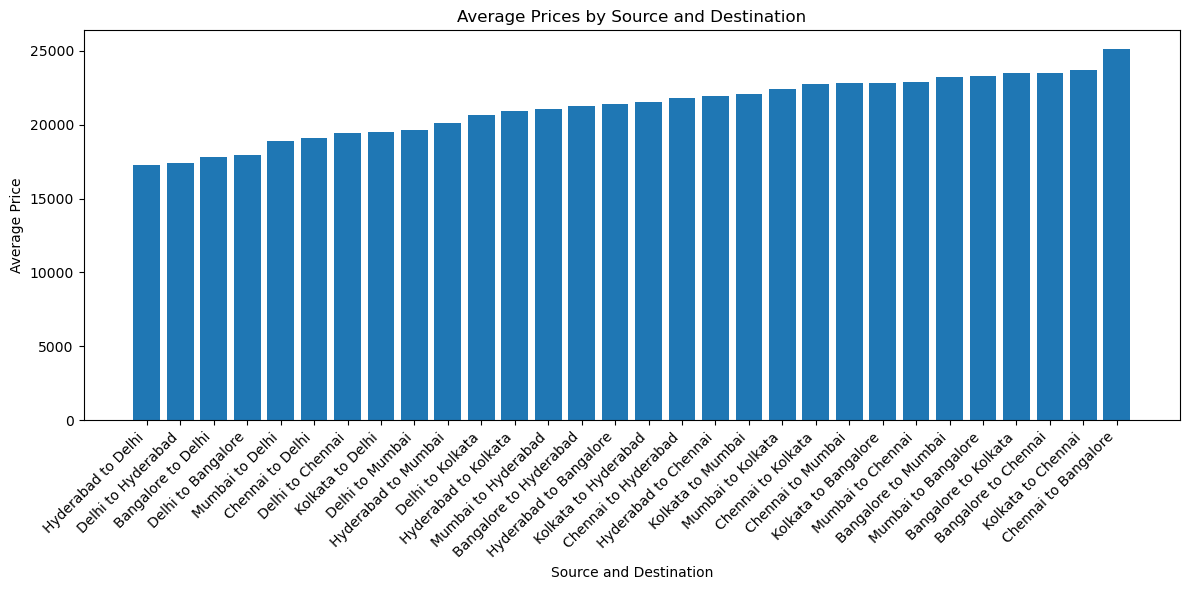

In [53]:
average_prices = df.groupby(['source_city', 'destination_city'])['price'].mean()
average_prices = average_prices.reset_index()
average_prices = average_prices.sort_values('price', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(range(len(average_prices)), average_prices['price'])
plt.xticks(range(len(average_prices)), average_prices['source_city'] + ' to ' + average_prices['destination_city'], rotation=45, ha='right')
plt.title('Average Prices by Source and Destination')
plt.xlabel('Source and Destination')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [54]:
average_prices

,source_city,destination_city,price
17,Hyderabad,Delhi,17294.354968
12,Delhi,Hyderabad,17408.647769
1,Bangalore,Delhi,17797.033746
10,Delhi,Bangalore,17976.104649
27,Mumbai,Delhi,18858.058908
6,Chennai,Delhi,19075.962536
11,Delhi,Chennai,19413.634983
22,Kolkata,Delhi,19485.458987
14,Delhi,Mumbai,19654.410576
19,Hyderabad,Mumbai,20080.865759


### E) How does the ticket price vary between Economy and Business class?

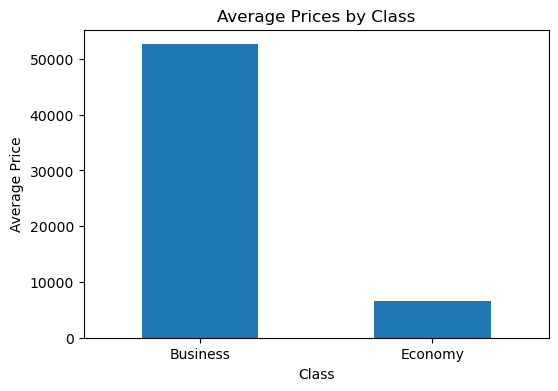

In [55]:
average_prices = df.groupby('class')['price'].mean()

plt.figure(figsize=(6, 4))
average_prices.plot(kind='bar')
plt.title('Average Prices by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [56]:
average_prices

class
Business    52591.353311
Economy      6591.047068
Name: price, dtype: float64

# Research Report:- 

### A) Does price vary with Airlines?

There is significant variation in ticket prices among different airlines, with Air India and Vistara having the highest average prices, while AirAsia and Indigo have comparatively lower average prices. This suggests that airline choice plays a crucial role in determining ticket prices for customers.

### B) How is the price affected when tickets are bought in just 1 or 2 days before departure?

Price of tickets increases significantly when they are bought just 1 or 2 days before departure. This suggests that last-minute bookings tend to be more expensive, indicating a potential price premium for the convenience of booking close to the departure date.

### C) Does ticket price change based on the departure time and arrival time?

 Ticket prices show variations based on the departure time and arrival time. Evening and night departures tend to have higher average prices, while late night departures and early morning arrivals have relatively lower average prices. This suggests that departure and arrival times can impact ticket pricing, potentially reflecting demand patterns and preferences of travelers.

### D) How the price changes with change in Source and Destination?

 Flight prices vary depending on the source and destination cities. The prices range from the lowest for the Delhi-Hyderabad route (17,243.94) to the highest for the Chennai-Bangalore route (25,081.85). This suggests that different routes may have different pricing dynamics influenced by factors such as distance, demand, and competition among airlines.

### E) How does the ticket price vary between Economy and Business class?

The average price for Business class is significantly higher than that of Economy class, indicating a notable price variation between the two classes.